# DBSCan
Data : ilustrasi k means.csv
- Plot the data using scatter plot make initial clustering
- Determine the optimal hyperparameter
    - minimum sample per cluster
    - epsilon
- Plot the data and clustering result (optimal hyperparameter) using scatter plot

> ## Library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

> ## Data

In [3]:
X = pd.read_csv(r'C:\Users\user\Documents\Data Science\MODUL 3\9. Unsupervised Learning\ilustrasi k means.csv', sep = ';')
X

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


> ## Data Visualization

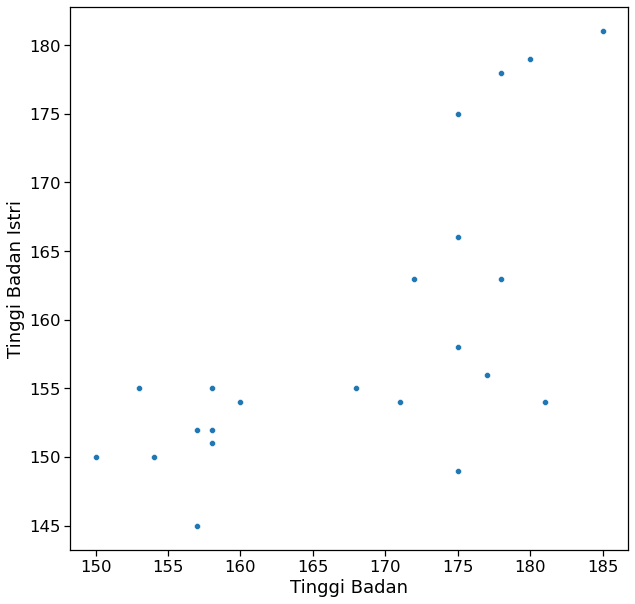

In [5]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=1.5)
sns.scatterplot(x = 'tinggibadan', y = 'tinggibadanistri', data = X)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

plt.show()

> ## Initial Clustering

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
dbscan = DBSCAN(eps = 0.7, min_samples = 5)
label = dbscan.fit_predict(X_scaled)

In [8]:
label

array([-1, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  1,
        1,  1,  1,  1,  1], dtype=int64)

In [9]:
silhouette_score(X_scaled, label)

0.6161772649616482

> ## Optimizing minimum samples and epsilon

In [12]:
for eps in [0.6, 0.65, 0.7]:
  for min_samples in [3, 4, 5, 6]:
    # epsilon and min samples
    print('epsilon', eps)
    print('min_samples', min_samples)
    
    # silhoutte score
    dbscan = DBSCAN(eps = eps, min_samples = min_samples)
    labels = dbscan.fit_predict(X_scaled)
    print('score', silhouette_score(X_scaled, labels))
    
    # cluster
    print('Clusters present: ', np.unique(labels))
    print('Cluster sizes: {}', np.bincount(labels + 1))
    
    print('\n')

epsilon 0.6
min_samples 3
score 0.4618572923610629
Clusters present:  [-1  0  1  2]
Cluster sizes: {} [1 4 8 9]


epsilon 0.6
min_samples 4
score 0.3901682187136734
Clusters present:  [-1  0  1]
Cluster sizes: {} [7 6 9]


epsilon 0.6
min_samples 5
score 0.35497113213899967
Clusters present:  [-1  0  1]
Cluster sizes: {} [8 5 9]


epsilon 0.6
min_samples 6
score 0.5300936637683802
Clusters present:  [-1  0]
Cluster sizes: {} [13  9]


epsilon 0.65
min_samples 3
score 0.6161772649616482
Clusters present:  [0 1 2]
Cluster sizes: {} [0 4 9 9]


epsilon 0.65
min_samples 4
score 0.6161772649616482
Clusters present:  [0 1 2]
Cluster sizes: {} [0 4 9 9]


epsilon 0.65
min_samples 5
score 0.4839777372002889
Clusters present:  [-1  0  1]
Cluster sizes: {} [6 7 9]


epsilon 0.65
min_samples 6
score 0.5300936637683802
Clusters present:  [-1  0]
Cluster sizes: {} [13  9]


epsilon 0.7
min_samples 3
score 0.6161772649616482
Clusters present:  [0 1 2]
Cluster sizes: {} [0 4 9 9]


epsilon 0.7
min_sa

> ## Final Clustering

In [13]:
dbscan = DBSCAN(eps = 0.7, min_samples = 4)
label = dbscan.fit_predict(X_scaled)

In [14]:
label

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2],
      dtype=int64)

In [16]:
X['cluster'] = label
X

,tinggibadan,tinggibadanistri,cluster
0,175,175,0
1,178,178,0
2,175,166,1
3,180,179,0
4,185,181,0
5,178,163,1
6,175,158,1
7,181,154,1
8,168,155,1
9,171,154,1


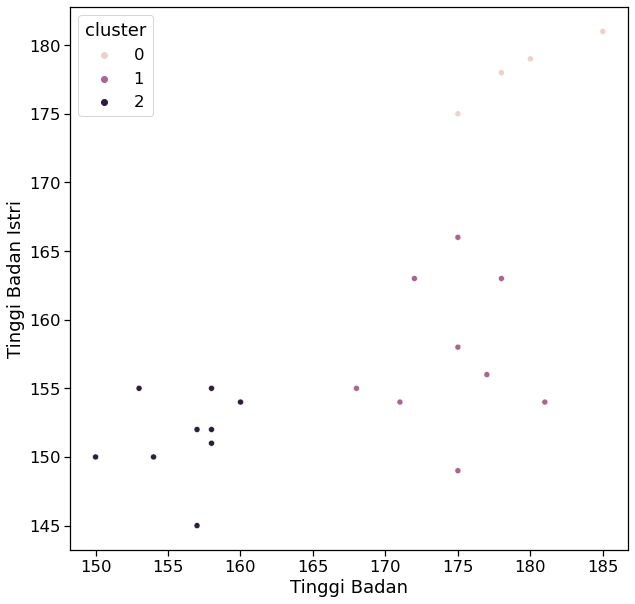

In [17]:
plt.figure(figsize = (10,10))
sns.set_context(context = 'notebook', font_scale=1.5)
sns.scatterplot(x = 'tinggibadan', y = 'tinggibadanistri', hue ='cluster', data = X)

plt.xlabel('Tinggi Badan')
plt.ylabel('Tinggi Badan Istri')

plt.show()